# Eirb'IA - Workshop d'Introduction à la science des données

Ce workshop est inspiré du cours "Intro to Machine Learning" de la plateforme [Kaggle](https://www.kaggle.com/learn/intro-to-machine-learning). Durant ce workshop, nous aurons pour objectif de prédire le prix des logements de l'état Iowa. Pour cela nous disposons des fichiers suivants :

- train.csv : jeu de données d’entraînement
- test.csv : jeu de données de test
- data_description.txt : Description de chaque variable du jeu de données

In [1]:
from utils import *
import matplotlib.pyplot as plt 
import numpy as np
import traceback

## 1. Exploration des données

Pour l'exploration de nos données nous allons utilisé la librairie Pandas.

Pandas est une bibliothèque écrite pour le langage de programmation Python permettant la manipulation et l'analyse des données. Elle propose en particulier des structures de données et des opérations de manipulation de tableaux numériques et de séries temporelles.

En tant que développeur, il est indispensable de savoir comment bien chercher une information dans une documentation : https://pandas.pydata.org/docs/user_guide/index.html

### Etape 1 : Chargement des données

In [2]:
import pandas as pd 

# Chemin du fichier à lire
iowa_file_path = 'train.csv'

# Remplir la ligne suivant pour transformer le fichier en dataframe, c'est un fichier .csv
home_data = ___


hide_toggle(text='Indice.', for_next=True)


In [3]:
# utiliser pd.read_csv

hide_toggle(text='Solution.', for_next=True)

In [4]:
home_data = pd.read_csv(iowa_file_path)

Maintenant que nous avons charger nos données nous pouvons afficher le fichier data_description pour en apprendre plus sur nos variables :

In [5]:
with open('data_description.txt', 'r') as d:
    print(d.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Comme vous pouvez le voir il est assez difficile d'avoir une bonne vision des données qu'on manipule avec ce fichier de descriptions. Nous allons donc utiliser des fonctions de Pandas pour mieux explorer nos données.

### Etape 2 : Examinez les données

In [6]:
# Afficher le résumé des statistiques des données
___

hide_toggle(text='Solution.', for_next=True)

In [7]:
%%capture

home_data.describe()

In [8]:
# Obtenir la moyenne des prix de ventes
meanSalePrice = ___

hide_toggle(text='Indice.', for_next=True)

meanSalePrice

In [9]:
# Il faut récupérer la colonne 'SalePrice' de la dataframe et 
# appeller dessus une méthode permettant de calculer une moyenne

hide_toggle(text='Solution.', for_next=True)

In [10]:
meanSalePrice = home_data['SalePrice'].mean()

### Etape 3 : Visualiser les données

La visualisation des données (ou data visualization ou dataviz en anglais) désigne le fait de représenter visuellement ses data pour pouvoir déceler et comprendre des informations, les données brutes étant difficilement interprétables et exploitables.

Pandas possède une bonne API de visualisation qui nous permettra de visualiser notre dataframe : https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [11]:
hide_toggle(text='Indice.', for_next=True)

# Afficher la distribution du prix des logements
___

In [12]:
# Après avoir choisis la bonne colonne, la méthode .plot.hist permet d'obtenir une disribution

hide_toggle(text='Solution.', for_next=True)

In [13]:
# home_data['SalePrice'].plot.hist(title='Sale Price distribution, bins=50)

Une matrice de corrélation est utilisée pour évaluer la dépendence entre plusieurs variables en même temps. Le résultat est une table contenant les coefficients de corrélation entre chaque variable et les autres. Il existe différentes méthodes de test de corrélation : Le test de corrélation de Pearson, la corrélation de Kendall et de Spearman qui sont des tests basés sur le rang. La matrice de corrélation se calcule uniquement à partir de données numérique.

https://fr.wikipedia.org/wiki/Corr%C3%A9lation_(statistiques)

In [14]:
import matplotlib.pyplot as plt

correlation = ___


styled_correlation = None
if isinstance(correlation, pd.DataFrame):
    styled_correlation = correlation.style.background_gradient(cmap='coolwarm')

styled_correlation

In [15]:
hide_toggle(text='Indice.', for_next=True)

In [16]:
# Il faut dans un premier temps récupérer les données numériques du dataframe à l'aide de la méthode .select_dtypes
# On peut également supprimer la première colonne de la dataframe, un ID qui n'est pas significatif dans la matrice 
# de corrélation. Finalement la méthode .corr permet d'obtenir la matrice de corrélation.
hide_toggle(text='Solution.', for_next=True)

In [17]:
correlation = home_data.select_dtypes(include=['float64','int64']).iloc[:,1:].corr()

Nous pouvons que les variables SalePrice et OverallQual sont très corrélés. Essayons d'afficher ses données sous la forme d'un nuage de point pour mieux observer cette correlation :

In [18]:
# Afficher sur un nuage de point OverallQual en fonction de SalePrice
hide_toggle(text='Indice.', for_next=True)

___

In [19]:
# Utiliser la méthode .plot.scatter qui prend en paramètres le nom des colonnes x et y

hide_toggle(text='Solution.', for_next=True)

In [20]:
#home_data.plot.scatter(x='OverallQual', y='SalePrice')

## 2. Traitement des données

### Etape 1 : Préparation du dataset pour l'apprentissage

Par convention le dataframe nommée `X` contient les variables que l'algorithme d'apprentissage exploiteras. La variable nommée `y` contient la variable cible `SalePrice` dans notre cas.

In [21]:
# Ici nous avons sélectionner des variables qui ont l'air d'être corrélé
# avec la variable SalePrice, vous êtes libre de modifié cette liste pour
# voir l'impact que ça auras dans la suite de l'apprentissage.
# Nous ne traiterons pas en détail de la sélection des variables dans ce workshop
feature_names = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF",
                      "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]

# Sélection les données qui correspondent aux variables sélectionnées
X = ___

# Sélection de la variable cible
y = ___

X

In [22]:
hide_toggle(text='Solution.', for_next=True)

In [23]:
X = home_data[feature_names]

y = home_data.SalePrice

### Etape 2 : Construction du modèle

Nous allons utiliser les arbres de décisions pour construire notre modèle. Pour cela nous allons utiliser la librairie `scikit-learn`.

Scikit-learn, encore appelé sklearn, est une bibliothèque puissante et robuste pour le machine learning en Python. Elle fournit une sélection d’outils efficaces pour l’apprentissage automatique et la modélisation statistique, notamment la classification, la régression et le clustering via une interface cohérente en Python. Cette bibliothèque, qui est en grande partie écrite en Python, s’appuie sur NumPy, SciPy et Matplotlib.

https://scikit-learn.org/stable/user_guide.html

Vous pourrez vous appuyez sur cette exemple pour voir comment il est possible de construire et d'entraîner le modèle ;

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [24]:
from sklearn.tree import DecisionTreeRegressor

# Spécifier le modèle
iowa_model = ___

# Entraîner le modèle
___

hide_toggle(text='Solution.', for_next=True)

In [25]:
%%capture

# Spécifier le modèle, sans argument particulier pour le moment
iowa_model = DecisionTreeRegressor()

# Entraîner le modèle
iowa_model.fit(X, y)

### Etape 3 : Faire des prédictions

Maintenant que notre modèle est crée nous allons pouvoir essayer de faire des prédictions sur une partie de nos données d'origine `X.head()` :

In [26]:
predictions = ___

print(predictions)
print(y.head())

hide_toggle(text='Solution.', for_next=True)

<IPython.core.display.HTML object>
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [27]:
predictions = iowa_model.predict(X.head())

Tester un modèle sur les données d'entraînement ne permet pas de validé un modèle, il faut tester le modèle sur des données qu'il n' jamais rencontré pour avoir une idée de son efficacité.

### Etape 4 : Valider le modèle

Pour tester le modèle nous allons scinder les données en deux dataframe distinct, le premier dataframe servira pour l'entraînement et le deuxième servira pour la validation du modèle. Pour cela, scikit-learn à prévu la fonction `train_test_split`.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [28]:
from sklearn.model_selection import train_test_split

# NE PAS TOUCHER
___4 = [___] * 4

X_train, X_test, y_train, y_test = ___4 

hide_toggle(text='Solution.', for_next=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Maintenant il faut refaire l'étape 2 (construction du modèle) mais uniquement avec le données d'entraînement.

In [30]:
# Spécifier le modèle
iowa_model = ___

# Entraîner le modèle
___

hide_toggle(text='Solution.', for_next=True)

In [31]:
%%capture

# Spécifier le modèle, sans argument particulier pour le moment
iowa_model = DecisionTreeRegressor()

# Entraîner le modèle
iowa_model.fit(X_train, y_train)

Finalement nous pouvons refaire l'étape 4 (Faire des prédictions) sur nos données de test.

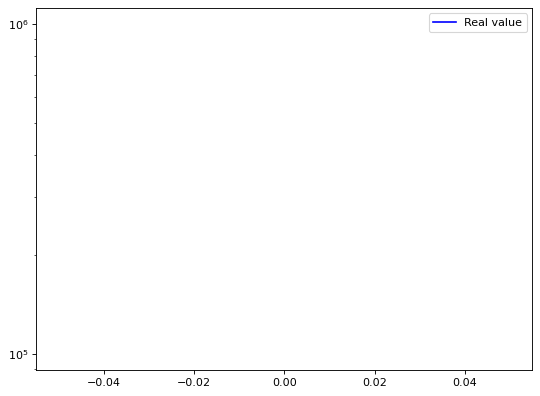

In [32]:
predictions = ___

hide_toggle(text='Solution.', for_next=True)

def compare_predictions_and_real_values(p, y):
    plt.figure(figsize=(8, 6), dpi=80)
    ind = np.argsort(p)
    plt.plot(y.values[ind], label='Real value', color='blue')
    if not isinstance(predictions, type(___)):
        plt.plot(p[ind], label='Predictions', color='red')
    plt.yscale('log')
    plt.legend()


compare_predictions_and_real_values(predictions, y_test)

In [33]:
hide_toggle(text='Solution.', for_next=True)

In [34]:
predictions = iowa_model.predict(X_test)

Un graphique n'est pas suffisant pour évaluer un modèle. Pour ça nous utilisons la méthode des moindres carrées.

La méthode des moindres carrés, indépendamment élaborée par Legendre et Gauss au début du xixe siècle, permet de comparer des données expérimentales, généralement entachées d’erreurs de mesure, à un modèle mathématique censé décrire ces données.

En statistiques, l’erreur quadratique moyenne d’un estimateur d’un paramètre de dimension 1 (mean squared error ($MSE$), en anglais) est une mesure caractérisant la « précision » de cet estimateur. Elle est plus souvent appelée « erreur quadratique » (« moyenne » étant sous-entendu) ; elle est parfois appelée aussi « risque quadratique ».

L’erreur quadratique moyenne est définie par :

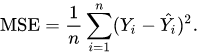

Avec $Y$ le vecteur des valeurs observés et $\hat{Y}$ le vecteur des valeurs prédis.

In [35]:
from sklearn.metrics import mean_absolute_error

hide_toggle(text='Solution.', for_next=True)

___

In [36]:
%%capture

mean_absolute_error(y_test, predictions)

Il est assez difficile d'interpreté la MSE. Dans les prochaines étapes nous allons essayer de minimiser cette erreur

### Overfitting & Underfiting

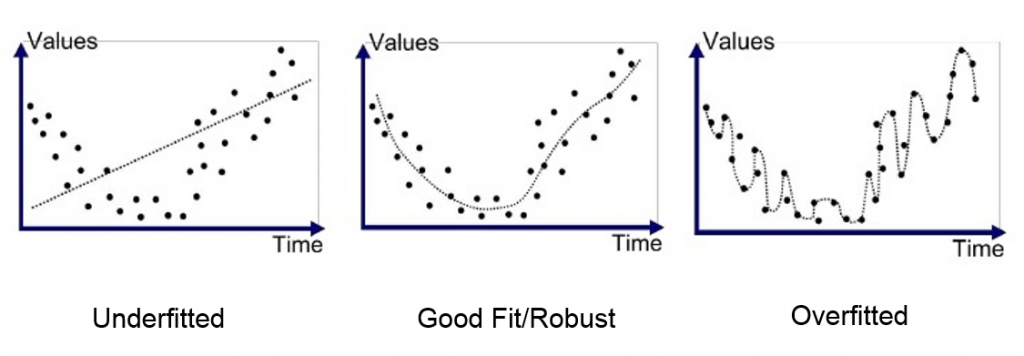

L’Overfitting (sur-apprentissage), et l’Underfitting (sous-apprentissage) sont les causes principales des mauvaises performances des modèles prédictifs générés par les algorithmes de Machine Learning.

#### Underfitting

un modèle statistique ou un algorithme d’apprentissage automatique est considéré comme présentant un sous-ajustement lorsqu’il ne peut pas capturer la tendance sous-jacente des données. (C’est comme essayer d’ajuster un pantalon trop petit !) Le sous- ajustement détruit la précision de notre modèle d’apprentissage automatique. Son occurrence signifie simplement que notre modèle ou l’algorithme ne correspond pas assez bien aux données. Cela se produit généralement lorsque nous avons moins de données pour construire un modèle précis et également lorsque nous essayons de construire un modèle linéaire avec moins de données non linéaires. Dans de tels cas, les règles du modèle d’apprentissage automatique sont trop simples et flexibles pour être appliquées à des données aussi minimales et, par conséquent, le modèle fera probablement beaucoup de prédictions erronées. Le sous-apprentissage peut être évité en utilisant plus de données et en réduisant également les caractéristiques par sélection de caractéristiques. 

En un mot, Underfitting – Biais élevé et faible variance 

#### Overfitting

Un modèle statistique est dit sur- ajustement lorsque nous l’entraînons avec beaucoup de données (tout comme nous nous enfilons dans un pantalon surdimensionné !) . Lorsqu’un modèle est entraîné avec autant de données, il commence à apprendre du bruit et des entrées de données inexactes dans notre ensemble de données. Ensuite, le modèle ne catégorise pas correctement les données, en raison de trop de détails et de bruit. Les causes du surajustement sont les méthodes non paramétriques et non linéaires, car ces types d’algorithmes d’apprentissage automatique ont plus de liberté pour créer le modèle basé sur l’ensemble de données et peuvent donc vraiment créer des modèles irréalistes. Une solution pour éviter le surapprentissage consiste à utiliser un algorithme linéaire si nous avons des données linéaires ou à utiliser des paramètres tels que la profondeur maximale si nous utilisons des arbres de décision. 


En bref, Overfitting – Variance élevée et biais faible

Source: https://fr.acervolima.com/ml-sous-apprentissage-et-sur-apprentissage/

#### Définir la taille de l'arbre

Il n'est pas toujours souhaitable en pratique de construire un arbre dont les feuilles correspondent à des sous-ensembles parfaitement homogènes du point de vue de la variable-cible. En effet, l'apprentissage est réalisé sur un échantillon que l'on espère représentatif d’une population. L'enjeu de toute technique d'apprentissage est d'arriver à saisir l'information utile sur la structure statistique de la population, en excluant les caractéristiques spécifiques au jeu de données étudié. Plus le modèle est complexe (plus l'arbre est grand, plus il a de branches, plus il a de feuilles), plus l'on court le risque de voir ce modèle incapable d'être extrapolé à de nouvelles données, c'est-à-dire de rendre compte de la réalité que l'on cherche à appréhender.

En particulier, dans le cas extrême où l'arbre a autant de feuilles qu'il y a d'individus dans la population (d'enregistrements dans le jeu de données), l'arbre ne commet alors aucune erreur sur cet échantillon puisqu'il en épouse toutes les caractéristiques, mais il n'est pas généralisable à un autre échantillon. C'est le problème de sur-apprentissage.

Nous allons essayer de faire varier la taille de l'arbre de décision afin de voir comment l'erreur évolue. Pour cela nous allons écrire une fonction qui prend une taille de noeud maximal, ainsi que les données d'entraînement et de test, construit le modèle, fait les prédictions sur les données d'entraînement et retourne la MSE:

In [37]:
# Si vous avez bien compris les précédentes étapes l'écriture de cette fonction est triviale :)
# DecisionTreeRegressor prend un argument max_leaf_nodes qui permet de réfler le nombre maximal de noeud dans l'arbre
def get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y):
    ___

hide_toggle(text='Solution.', for_next=True)

In [38]:
def get_mae_solution(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    return mean_absolute_error(test_y, preds_val)

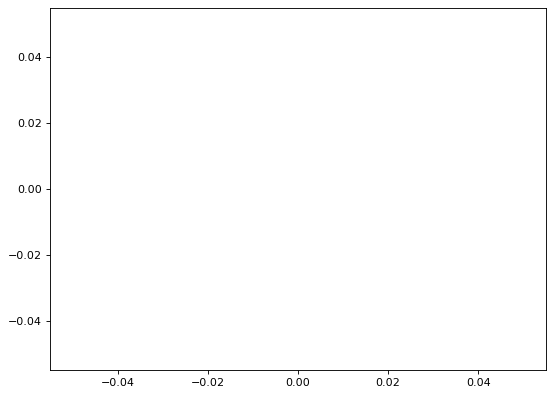

In [39]:
try:
    rang = range(5, 500, 5)
    mae_evolution = [get_mae(mln, X_train, X_test, y_train, y_test) for mln in rang]
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(rang, mae_evolution, label = 'Evolution de la MSE')
    minimum_value_indice = np.argmin(mae_evolution)
    plt.scatter(
        rang[minimum_value_indice], 
        mae_evolution[minimum_value_indice], 
        label='Nombre optimal de noeud = ' + str(rang[minimum_value_indice]), 
        color='red'
    )
    plt.xlabel('Nombre maximum de noeud')
    plt.ylabel('MSE')
    plt.legend()
except TypeError:
    pass

Nous pouvons maintenant construire un modèle final optimisé avec les bons paramètres (un nombre maximum de noeud) en utilisant l'ensemble des données

In [40]:
# Spécifier le modèle, sans argument particulier pour le moment
iowa_final_model = ___

# Entraîner le modèle
___

hide_toggle(text='Solution.', for_next=True)

In [41]:
%%capture

minimum_value_indice = 42

iowa_final_model = DecisionTreeRegressor(max_leaf_nodes=rang[minimum_value_indice], random_state=0)

iowa_final_model.fit(X, y)

## Pour aller plus loin...

Dans la continuité de ce workshop, vous pouvez :
- Essayer de remplacer les arbres de décisions par des [forêts aléatoires](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) un algorithme beaucoup plus puissant que celui que nous avons vu, qui effectue un apprentissage sur de multiples arbres de décision entraînés sur des sous-ensembles de données légèrement différents.
- Le problème que nous avons traité est issus d'une compétition Kaggle. Vous pouvez utiliser votre modèle pour prédire les données qui se trouvent dans le fichier `test.csv` et faire une soumission sur le site Kaggle qui vous donneras un score basés sur vos bonnes prédictions https://www.kaggle.com/c/home-data-for-ml-course. La création 'un fichier csv seras nécéssaire pour la soumission de vos résultats, il y a un exemple de soumission dans le fichier `sample_submission.csv`


Félicitations! Vous avez construit résolu votre premier problème de sens des données, mais il vous reste encore beaucoup de choses à découvrir. Les étapes suivantes sont :
 - La gestion des valeurs manquantes
 - La gestion les variables catégoriques
 - Le nettoyage de la donnée
 - La validation croisée de modèle
 - Le choix des variables <br>
 ...
 
 Pour approfondir votre apprentissage, je vous invite à explorer les différents cours que met à disposition la plateforme [Kaggle](https://www.kaggle.com/learn).